# Construindo modelos com distancias métricas

Clustering é relacionado classificação de categorias, há conjunto finitos de categorias. Ao contrário da "classificação", com clustering não se sabe quais categorias há.

## Usando K-means para agrupar dados

Primeiro bora ver como se faz um clustering simples

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import make_blobs
bolhas, classes = make_blobs(500, centers=3)

In [3]:
# para visualizar
import matplotlib.pyplot as plt
%matplotlib inline

Trabalhando com dados não verdadeiros (fake data)

1. olhando para os bolhas(blobs)

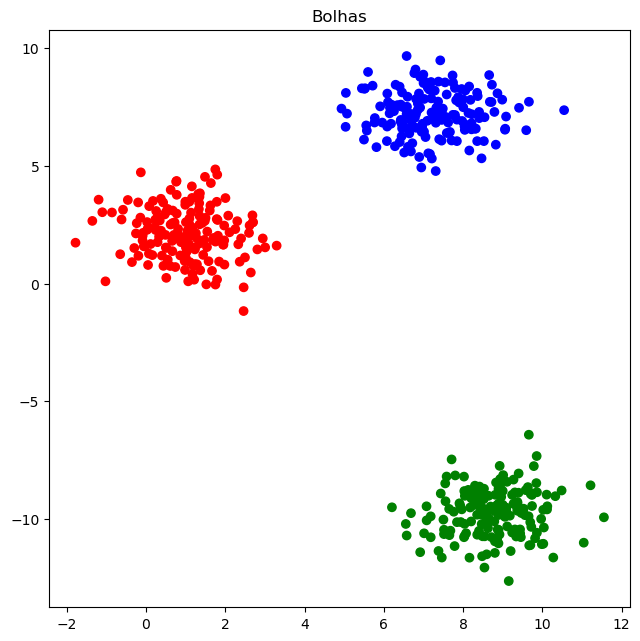

In [4]:
f, ax = plt.subplots(figsize=(7.5,7.5))
rgb = np.array(['r','g','b'])
ax.scatter(bolhas[:,0], bolhas[:,1], color=rgb[classes])
ax.set_title("Bolhas")
plt.show()

O **K-means** serve para encontrar o centro destas bolhas

2. vamos fingir que há 3 centros

In [5]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)

In [6]:
kmean.fit(bolhas)

KMeans(n_clusters=3)

In [7]:
kmean.cluster_centers_

array([[ 8.75214132, -9.6907485 ],
       [ 7.21605085,  7.2247352 ],
       [ 0.99593715,  2.14518268]])

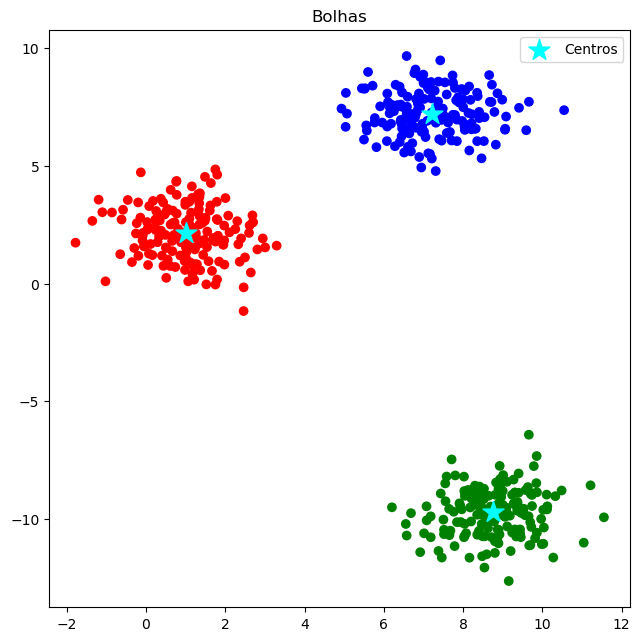

In [8]:
# visualizar
f, ax = plt.subplots(figsize=(7.5,7.5))
ax.scatter(bolhas[:,0], bolhas[:,1], color=rgb[classes])
ax.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], marker='*', s=250, color="cyan", label="Centros")
ax.set_title("Bolhas")
ax.legend(loc="best")
plt.show()

In [9]:
kmean.labels_[:5]

array([1, 0, 1, 0, 2], dtype=int32)

Pode-se verficar se o `labels_` é o mesmo que `classes`

In [10]:
classes[:5]

array([2, 1, 2, 1, 0])

A função `transform` é bem útil no sentido que mostra a distância entre cada ponto e o centroide

In [11]:
kmean.transform(bolhas)[:5]

array([[17.77564797,  1.86136488,  9.86045202],
       [ 1.42267587, 18.0002938 , 15.50961107],
       [16.45754147,  0.90156624,  7.13050388],
       [ 1.23814046, 16.16795032, 13.88551299],
       [14.65488251,  6.95906487,  1.13791797]])

## Como funciona

K-mean é um algoritmo que funciona minimizando a distância da soma dos quadrados desde a média.

Funciona primeiro assignando um número de grupos, K, e depois alternando o seguinte:

- Designar cada ponto para o grupo mais próximo
- atualizar o centroide do grupo, calculando a média de todos os membros do grupo incluindo os recentes adicionados.

## Otimizando o número de centroides

Quando se faz clustering, não se sabe o número exato de grupos por antecipado, mas uma vez estimado o número de grupos, o problema começa ficar apropriado para classificação.
Avaliar as técnicas para modelos sem supervisão é um tanto meticuloso... o scikit learn tem algumas alternativas

1. criar varias blobs (bolhas) que serve para simular os grupos

In [12]:
from sklearn.datasets import make_blobs
import numpy as np

In [13]:
blobs, classes = make_blobs(500, centers=3)

In [14]:
kmean = KMeans(n_clusters=3)

In [15]:
kmean.fit(blobs)

KMeans(n_clusters=3)

2. Olharar para a silhueta da distância. Essa silhueta é a taxa de diferença entre dissimilaridade no grupo e a dissimilaridade mais proxima fora do grupo. Poderia ser dito, o quã longe estam os grupos entre sí.

In [16]:
from sklearn import metrics

In [17]:
silhueta_ex = metrics.silhouette_samples(blobs, kmean.labels_)
np.column_stack((classes[:5], silhueta_ex[:5]))

array([[2.        , 0.76177072],
       [1.        , 0.87041449],
       [1.        , 0.89522892],
       [2.        , 0.79286353],
       [1.        , 0.71741671]])

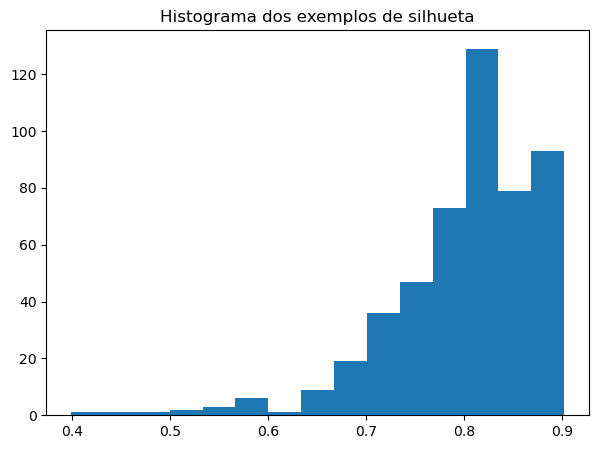

In [18]:
f, ax = plt.subplots(figsize=(7,5))
ax.hist(silhueta_ex, bins=15)
ax.set_title("Histograma dos exemplos de silhueta")
plt.show()

Nesse gráfico da para perceber que a maioria dos dados estam próximos de 1, oq é bom (mais próximo melhor).

## Como funciona

A média do coeficiente da silhueta pode ser usada para descrevr os ajustes inteiros do modelo.

In [19]:
silhueta_ex.mean()

0.8017690078064131

O módulo `metrics`também tem uma função para chegar no valor da média

In [20]:
metrics.silhouette_score(blobs, kmean.labels_)

0.8017690078064131

In [21]:
# visualizar
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
blobs, classes =  make_blobs(500, centers=10)
silhouete_avg = []
for k in range(2,60):
    kmean = KMeans(n_clusters=k).fit(blobs)
    silhouete_avg.append(metrics.silhouette_score(blobs, kmean.labels_))

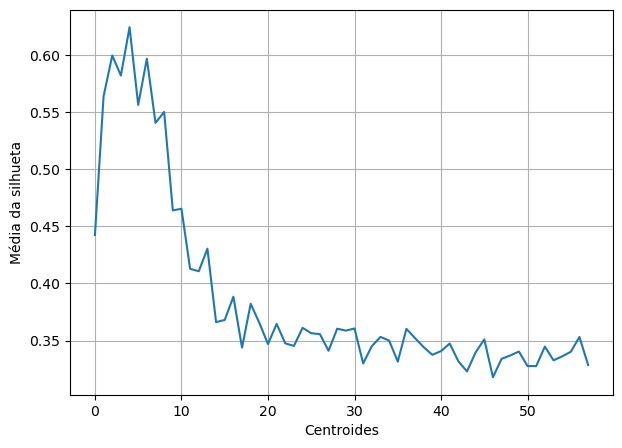

In [23]:
f, ax = plt.subplots(figsize= (7,5))
ax.plot(silhouete_avg)
ax.set_xlabel("Centroides")
ax.set_ylabel("Média da silhueta")
ax.grid(True, which="both")
plt.show()

O gráfico mostra as médias da silhueta em função dos centroides.  No começo testamos tendo 3 centroides, mas no gráfico vemos que o valor o melhor valor está entre 0-10. Esse gráfico serve para fazer uma estimativa da quantidade de grupos aproximadamente.

## Avaliando a correção dos agrupamentos

Avaliando o k-means quando o agrupamento é conhecido,na maioria dos casos, é desconhecido mas se há algumas anotações será possível se aproximar da veracidade, para isso criarei um conjunto de dados simples, e avaliar alguns pontos.

In [24]:
from sklearn import datasets
from sklearn import cluster

In [25]:
blob , veracidade = datasets.make_blobs(1000, centers=3, cluster_std=1.75)

## COm fazer

1. primeiro olhar o conjunto de dados

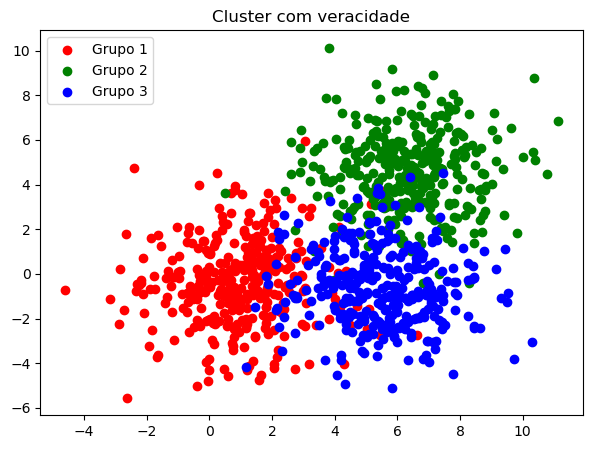

In [26]:
# import matplotlib.pyplot as plt
#%matplotlib inline

f, ax = plt.subplots(figsize=(7,5))
colors = ["r", 'g', 'b']
for i in range(3):
    p = blob[veracidade == i]
    ax.scatter(p[:,0], p[:,1], c=colors[i], label=f"Grupo {i+1}")
ax.set_title("Cluster com veracidade")
ax.legend()
plt.show()

2. Para ajustar o modelo k-means, criar um objeto `KMeans` do modelo cluster

In [27]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(blob)

KMeans(n_clusters=3)

In [28]:
kmeans.cluster_centers_

array([[ 0.82024465, -0.41207235],
       [ 5.70853474, -0.75902751],
       [ 6.26642393,  4.73313903]])

3. agora que houve um ajuste, veja os centroides

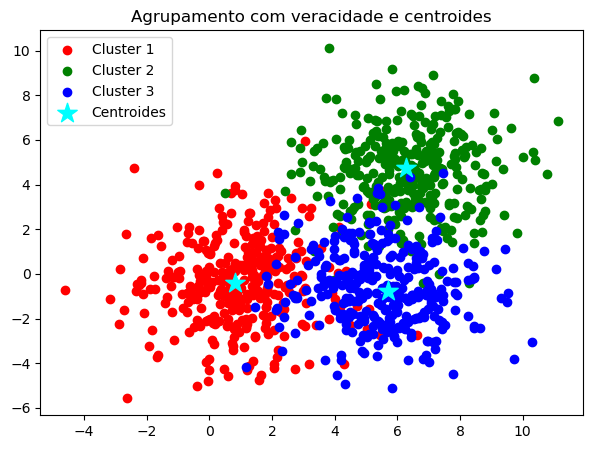

In [29]:
f,ax = plt.subplots(figsize=(7,5))
for i in range(3):
    p = blob[veracidade == i]
    ax.scatter(p[:,0], p[:,1], c=colors[i], label=f"Cluster {i+1}")

ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           marker="*", s=215, color="cyan", label="Centroides")
ax.set_title("Agrupamento com veracidade e centroides")
ax.legend()
plt.show()

4. vendo o rendimento do agrupamento como um exercicio de classificação, há métricas que vão ser úteis aqui

In [33]:
for i in range(3):
    print((kmeans.labels_== veracidade)[veracidade == i].astype(np.int64).mean())

0.9191616766467066
0.06306306306306306
0.05405405405405406


Há alguns retrocesso no agrupamento, primeiro ajustar para depois ver a exatidão

In [36]:
nova_veracidade = veracidade.copy()
nova_veracidade[veracidade == 1] = 2
nova_veracidade[veracidade == 2] = 1

In [37]:
for i in range(3):
    print((kmeans.labels_==nova_veracidade)[nova_veracidade == i].astype(np.int64).mean())

0.9191616766467066
0.8618618618618619
0.9279279279279279


O segunda medida para aprender é `mutual information score` (pontuação de informação mútua)

In [38]:
#from sklearn import metrics
metrics.normalized_mutual_info_score(veracidade, kmeans.labels_)

0.6640460620707417

Se a pontuação vai para perto de zero, não há um processo similar entre veracidade e kmean.labels_ , se a pontuçaõ vai para perto de um '1', há uma grande quantidade de acordo entre os labels (etiquetas que machine learning usa para identificar os dados)

In [39]:
#exemplo de score indo para 1
metrics.normalized_mutual_info_score(veracidade, veracidade)

1.0

In [40]:
metrics.mutual_info_score(veracidade, kmeans.labels_)

0.72950357261685

`normalized_mutual_info_score` e `mutual_info_score` são bem parecidos, normalized_mutual_info_score é o `mutual_info_score` dividido pela raiz do produto de cada conjunto veraz e etiquetado.

Uma metrica para cluster que não é muito comentada é `inertia` que é a soma da diferença dos quadrados entre cada ponto.

In [41]:
kmeans.inertia_

4923.401205696991

## Usando MiniBatch K-means para lidar com mais dados

minibatch k-means é uma solução com uma melhor complexidade algoritmica, para grandes quantidades de dados.

1. primeiro olhar para a diferença em velocidade de computação, e depois os erros nas estimativas

In [43]:
import numpy as np
from sklearn.datasets import make_blobs

blobs, labels = make_blobs(int(1e7),3)
from sklearn.cluster import KMeans, MiniBatchKMeans

In [44]:
kmea = KMeans(n_clusters=3)
minibatch =  MiniBatchKMeans(n_clusters=3)

2. Uma vez a configuração está pronta, medir as diferenças

In [47]:
%time kmea.fit(blobs)

CPU times: user 5.32 s, sys: 297 ms, total: 5.62 s
Wall time: 1.69 s


KMeans(n_clusters=3)

In [46]:
%time minibatch.fit(blobs)

CPU times: user 403 ms, sys: 11.9 ms, total: 415 ms
Wall time: 140 ms


MiniBatchKMeans(n_clusters=3)

3. A diferença entre o desempenho do agrupamento a continuação:


In [48]:
kmea.cluster_centers_

array([[-6.25911458,  1.61123583, -9.38749048],
       [-0.14602236, -8.88608962, -1.94799347],
       [-4.0222165 ,  1.59571806, -0.15085421]])

In [49]:
minibatch.cluster_centers_

array([[-4.04408501,  1.60837746, -0.16392385],
       [-0.1416334 , -8.88819212, -1.95509328],
       [-6.24367467,  1.62872057, -9.37268768]])

4. Olhando nas duas matrizes, ver a distância entre os primeiro centros do agrupamento

In [51]:
from sklearn.metrics import pairwise

In [52]:
pairwise.pairwise_distances(kmea.cluster_centers_[0].reshape(1,-1),
                           minibatch.cluster_centers_[0].reshape(1,-1))

array([[9.48580759]])

5. olhar na diagonal principal da matriz, que contem as diferenças do centro do grupo

In [53]:
np.diag(pairwise.pairwise_distances(kmea.cluster_centers_,minibatch.cluster_centers_))

array([9.48580759e+00, 8.60759166e-03, 9.48568279e+00])